In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
from scipy.ndimage import uniform_filter1d
import tqdm


sys.path.append('../pipeline_scripts/')
from pipeline_main import serialize_dictionary, pipeline, sinks
from pipeline_1D import to_1D
from plotting_setup import *


In [31]:
data = pipeline(snap = 348, run = 'sink13fmr05', sink_id=13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:19<00:00, 211.06it/s]


In [25]:
data.recalc_L()

Converged mean angular momentum vector after 0 iteration(s)


In [26]:
data.L

array([ 0.81433626, -0.40195632,  0.41867359])

In [32]:
data.calc_L(); data.calc_cyl()
data.calc_disksize(verbose=0, radial_bins=200, r_in=5, radius=200, plot=False)
disk = data.disk_size; disk_ = 9999
while abs(disk - disk_) / disk > 1e-2:
    data.recalc_L(radius=disk)
    data.calc_disksize(verbose=0, radial_bins=200, r_in=5, radius=200, plot=False)
    print(data.disk_size)
    disk_ = disk.copy()
    disk = data.disk_size.copy()
    

100%|██████████| 4165/4165 [00:01<00:00, 3181.22it/s]


Converged mean angular momentum vector after 1 iteration(s)


100%|██████████| 4165/4165 [00:01<00:00, 3215.16it/s]


24.395566969850243
Converged mean angular momentum vector after 1 iteration(s)


100%|██████████| 4165/4165 [00:01<00:00, 3198.54it/s]


22.236076129932126
Converged mean angular momentum vector after 0 iteration(s)


100%|██████████| 4165/4165 [00:01<00:00, 3205.16it/s]

22.236076129932126


In [24]:
data.calc_L()
data.L

array([ 0.81433626, -0.40195632,  0.41867359])

Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:01<00:00, 2355.88it/s]


Disk size: 21.9 au


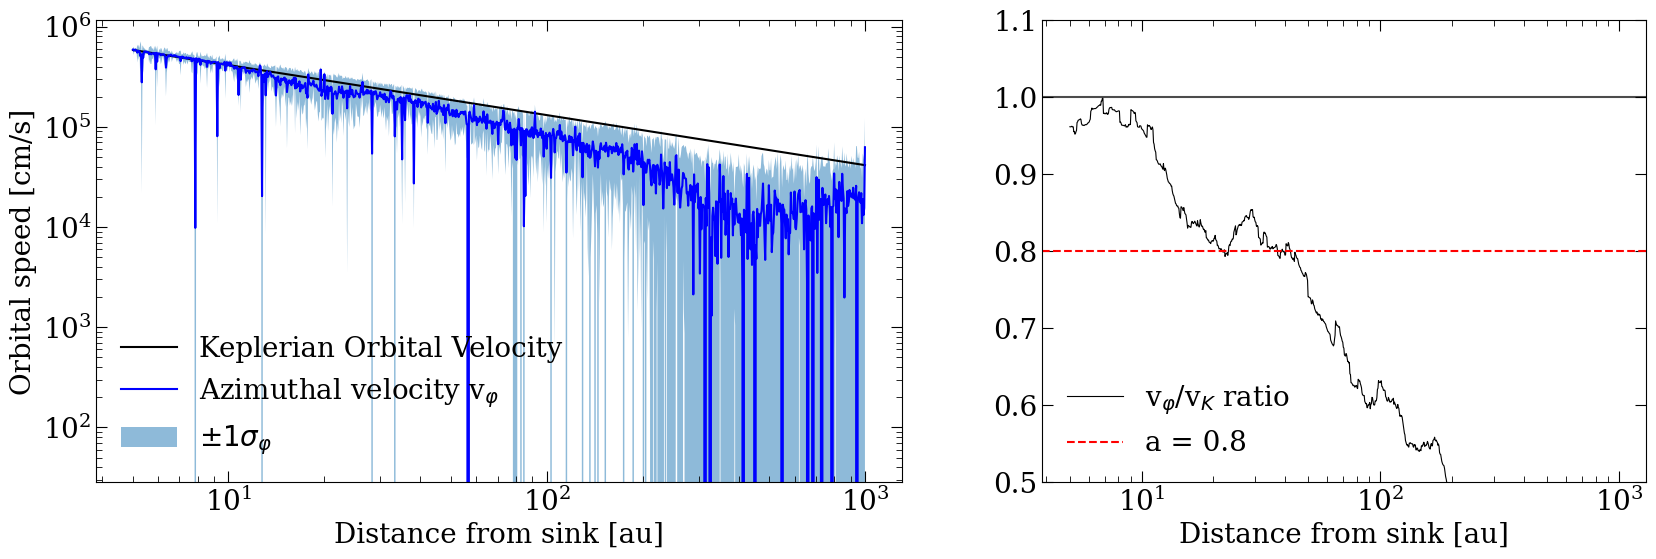

In [33]:
data.calc_disksize(verbose=1, radial_bins=1000, r_in=5, radius=1000, plot=True,avg_cells=50)

Converged mean angular momentum vector after 1 iteration(s)


Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:01<00:00, 3160.93it/s]


Disk size: 8.6 au


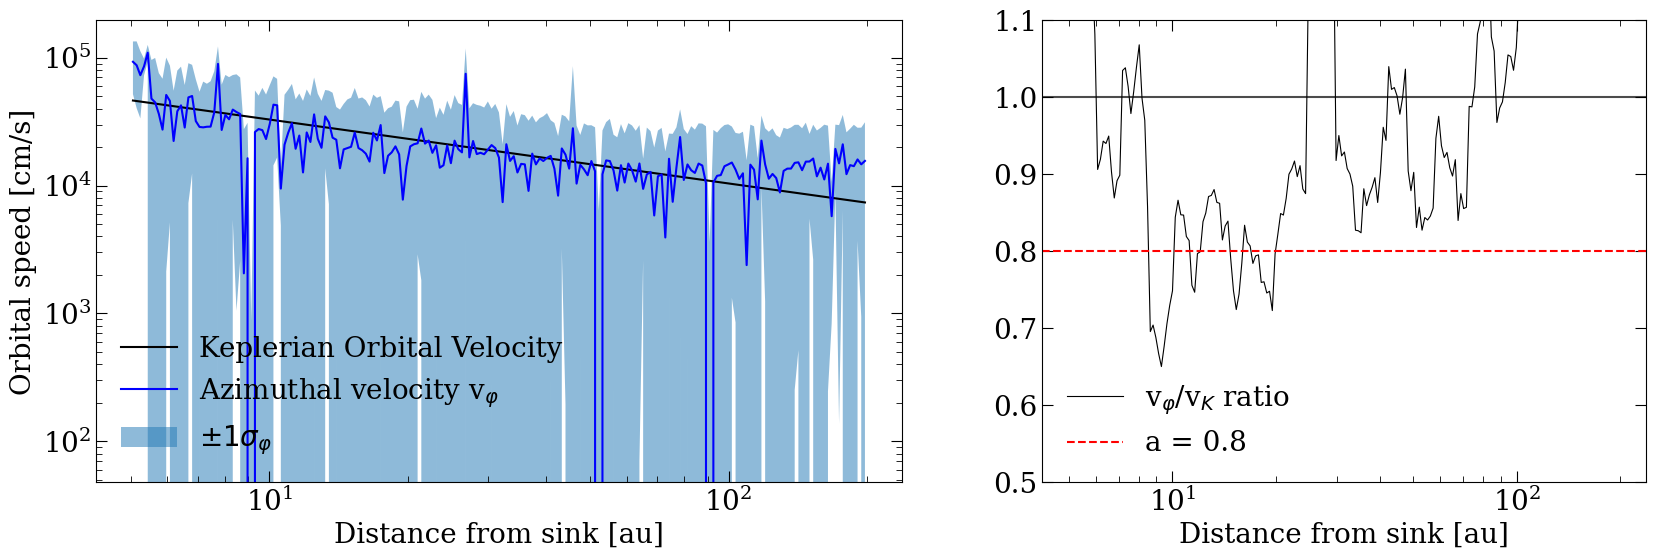

In [65]:
data.calc_disksize(verbose=1, radial_bins=200, r_in=5, radius=200)

In [43]:
data.to_1D(plot = False, r_in= 5, r_out = 200, Nr = 200, verbose = 0)

100%|██████████| 199/199 [00:04<00:00, 43.16it/s]


In [15]:
plot_data = serialize_dictionary(filename = 'fmr05AM_evolution2.pkl', store = False)

In [16]:
disk_size = {sink: np.zeros_like(plot_data[sink]['time']) for sink in sinks}

for i, sink in enumerate(sinks):
    for j in range(len(plot_data[sink]['time'])):
        if plot_data[sink]['time'][j] == 0: 
            disk_size[sink][j] = np.nan
            continue
        kep_vel = plot_data[sink]['v_kep'][j]
        v_φ = plot_data[sink]['v_φ'][j]
        orbitvel_ratio_mean = uniform_filter1d(v_φ / kep_vel, size = 10)
        for k in range(len(v_φ)):
            if orbitvel_ratio_mean[k] < 0.8:
                disk_size[sink][j] = data.r_1D[k] * data.au_length
                break
        

In [41]:
len(v_φ), 

199

In [19]:
plot_data[13].keys()

dict_keys(['v_φ', 'v_kep', 'Σ', 'H', 'orientation', 'time'])

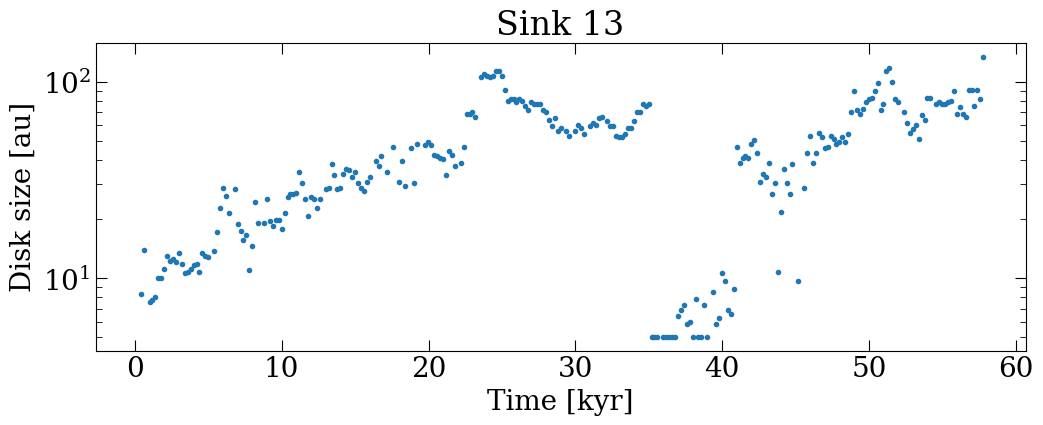

In [37]:
fig, axs = plt.subplots(figsize = (12,4))

s = 13

true = (disk_size[s] != 0) | (disk_size[s] != np.nan)

axs.scatter(plot_data[13]['time'][true] * 1e-3, disk_size[13][true], marker = '.')
axs.set(xlabel = 'Time [kyr]', ylabel = 'Disk size [au]', title = f'Sink {s}')
axs.set_yscale('log')

In [46]:
disk_size[13]

array([  0.        ,   8.32489679,  13.98924687,   0.        ,
         7.58797855,   7.72994933,   8.0219094 ,  10.02038447,
        10.02038447,  11.19921808,  12.9894907 ,  12.28684742,
        12.51673386,  12.06118316,  13.48010357,  11.83966351,
        10.5934164 ,  10.7916188 ,  11.19921808,  11.62221237,
        11.83966351,  10.7916188 ,  13.48010357,  12.9894907 ,
        12.75092146,          nan,  13.73231578,  17.15340787,
        22.65211225,  28.82477264,  26.27320937,  21.42678673,
         0.        ,  28.29536742,  18.81928754,  17.47434746,
        15.63499154,  16.52910387,  10.99352957,  14.51762051,
        24.39556697,  19.17139567,          nan,  19.17139567,
        25.31698716,  19.53009174,  18.47364633,  19.89549899,
        19.89549899,  17.80129182,  21.42678673,  25.790667  ,
        26.76478009,  26.76478009,  27.26554809,  34.69536155,
        30.47316397,  25.31698716,  20.64695168,  25.790667  ,
        25.31698716,  22.65211225,  25.31698716,       

In [3]:
data.recalc_L(verbose = 0)

In [40]:
data.r_1D * data.au_length

array([  5.0467749 ,   5.14119986,   5.23739151,   5.3353829 ,
         5.43520771,   5.53690023,   5.64049542,   5.74602887,
         5.85353685,   5.96305629,   6.07462484,   6.18828084,
         6.30406333,   6.42201211,   6.5421677 ,   6.66457141,
         6.78926528,   6.91629216,   7.04569572,   7.17752041,
         7.31181154,   7.44861525,   7.58797855,   7.72994933,
         7.87457638,   8.0219094 ,   8.17199901,   8.32489679,
         8.48065529,   8.63932802,   8.80096951,   8.9656353 ,
         9.13338199,   9.30426721,   9.47834969,   9.65568924,
         9.83634681,  10.02038447,  10.20786547,  10.39885424,
        10.5934164 ,  10.7916188 ,  10.99352957,  11.19921808,
        11.40875501,  11.62221237,  11.83966351,  12.06118316,
        12.28684742,  12.51673386,  12.75092146,  12.9894907 ,
        13.23252357,  13.48010357,  13.73231578,  13.98924687,
        14.25098513,  14.51762051,  14.78924462,  15.06595081,
        15.34783416,  15.63499154,  15.92752162,  16.22

Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:01<00:00, 3169.94it/s]


Disk size: 6.0 au


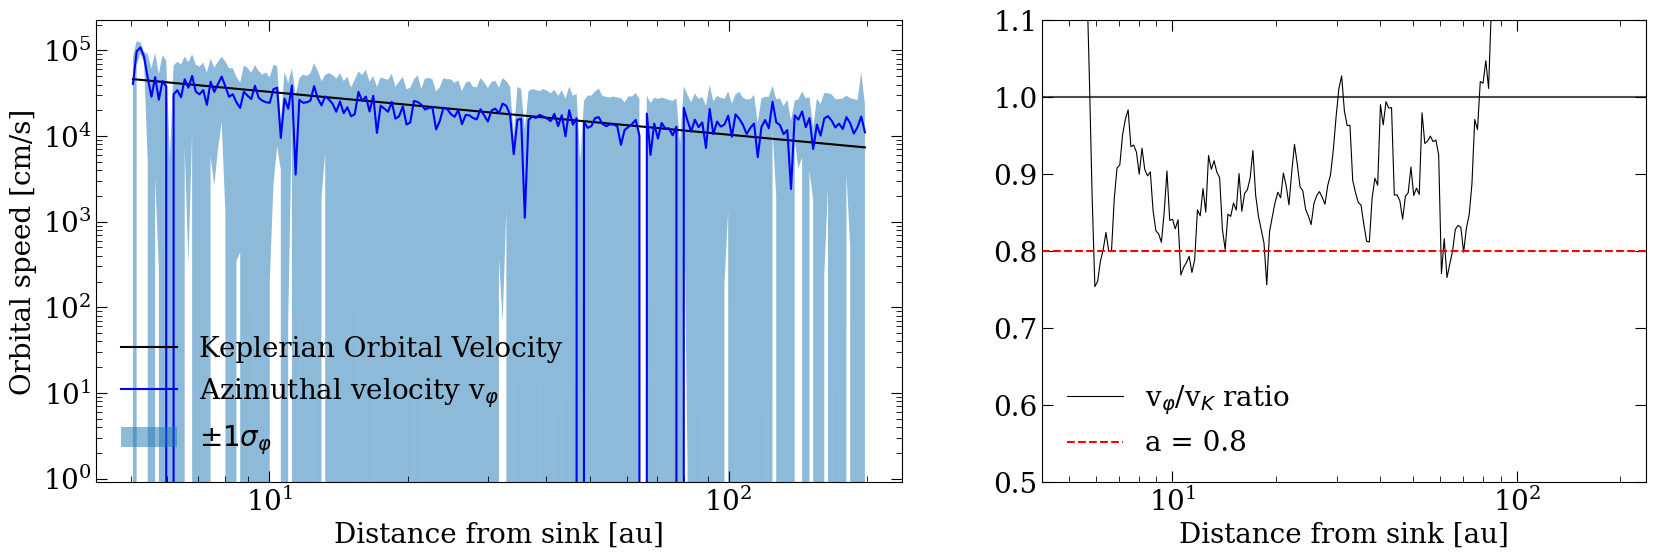

In [45]:
data.calc_disksize(verbose=1, radial_bins=200, r_in=5, radius=200)

In [ ]:
data.to_1D(plot = False, r_in= 5, r_out = 200, Nr = 200, verbose = 0)